# Indicators of Heavy Traffic on I-94
In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

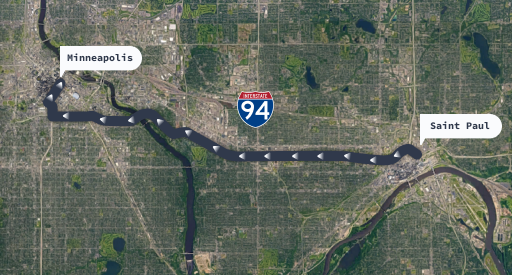

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## The I-94 Traffic Dataset
John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Our analysis will be about the westbound traffic in the proximity of that station. In other words, the results does not describe the entire I-94 highway.

In [9]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

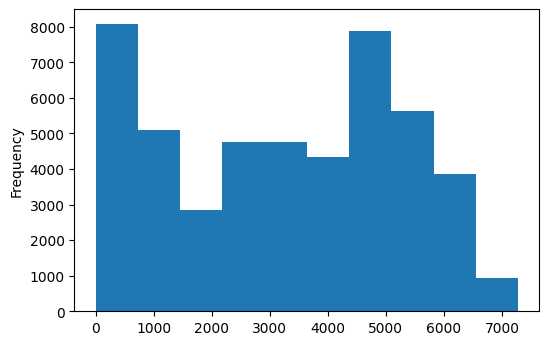

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
i_94['traffic_volume'].describe()

There seems to be high frequency of around 5000 traffic volume. I would conjecture that this is rush hour (7-10am) traffic. And the high frequency of <1000 traffic volume is non-rush hour.

## Traffic Volume: Day vs. Night

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [19]:
#Transform the date_time column to datetime by using the function pd.to_datetime()
i_94['date_time']=pd.to_datetime(i_94['date_time'])

#Isolate the daytime data.
daytime = i_94.copy()[(i_94['date_time'].dt.hour >=7) & (i_94['date_time'].dt.hour <19)]
print(daytime.shape)

#Isolate the nighttime data.
nighttime = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(nighttime.shape)

(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

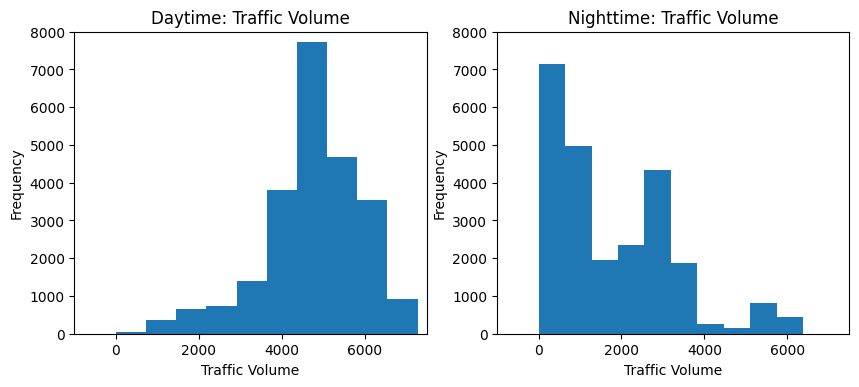

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([-1000,7500])


plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.xlim([-1000,7500])
plt.show()

In [30]:
daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [31]:
nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


### Analyze the results:

- What shape do the histograms have and what does that indicate?

    There is visibly higher volume at daytime. The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

    The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.
    
    
- If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?
    
   Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators: Month and Year

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day. People's time of day that they commute to work is most likely an indicator.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [35]:
#create a new column where each value describes the month when the traffic volume measurement was taken
daytime['month'] = daytime['date_time'].dt.month


#group the dataset by the month column with the mean as an aggregate function
by_month = daytime.groupby('month').mean()
print(by_month)

             temp   rain_1h   snow_1h  clouds_all  traffic_volume
month                                                            
1      265.483409  0.015080  0.000631   58.554108     4495.613727
2      266.663789  0.004019  0.000000   51.550459     4711.198394
3      273.619940  0.015839  0.000000   56.827811     4889.409560
4      279.661071  0.105343  0.000000   59.221525     4906.894305
5      289.282668  0.130863  0.000000   56.548825     4911.121609
6      294.576068  0.271121  0.000000   48.612374     4898.019566
7      296.785052  4.412258  0.000000   42.176619     4595.035744
8      295.119191  0.228113  0.000000   42.556892     4928.302035
9      292.520287  0.289807  0.000000   45.184112     4870.783145
10     284.081011  0.016065  0.000000   53.497990     4921.234922
11     276.698007  0.006200  0.000000   56.697187     4704.094319
12     267.727846  0.035365  0.002213   66.942237     4374.834566


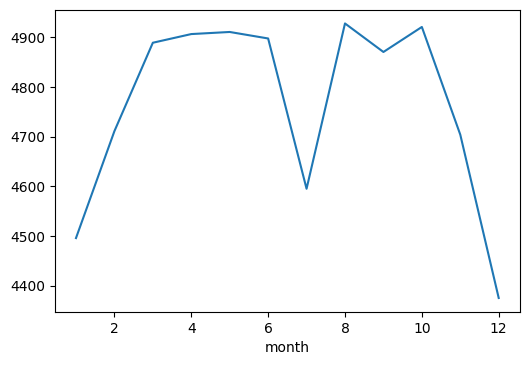

In [36]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

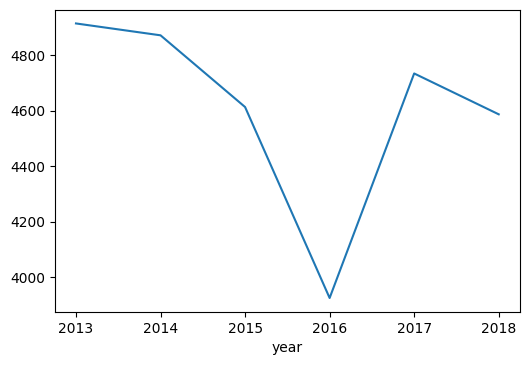

In [38]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july_by_year= only_july.groupby('year').mean()
only_july_by_year['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators: Day of Week

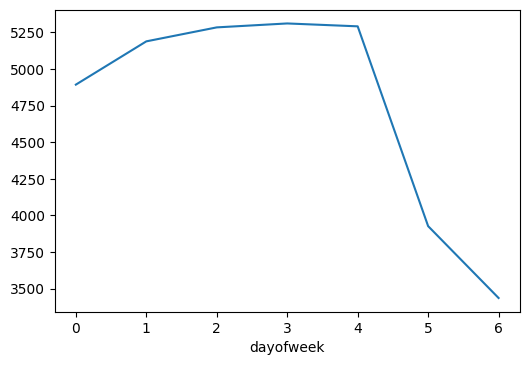

In [55]:
#visualize how the traffic volume changed each day of the week on average.
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators: Hour of Day and Part of Week

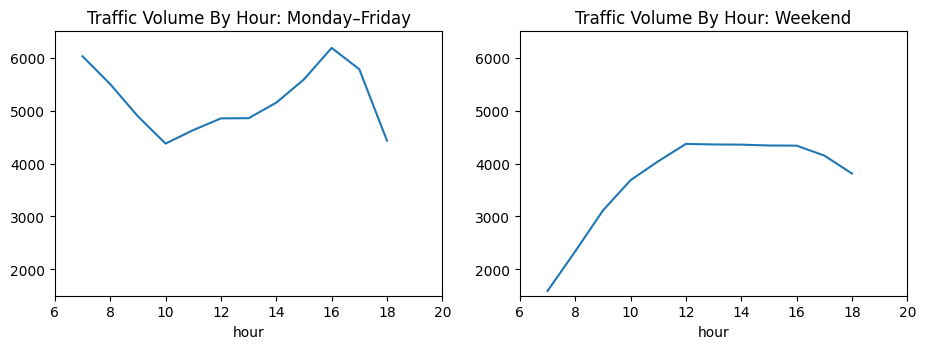

In [40]:
daytime['hour'] = daytime['date_time'].dt.hour

workdays = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 = Saturday
by_hour_workdays = workdays.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_workdays['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

### To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7am and 4pm.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [41]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

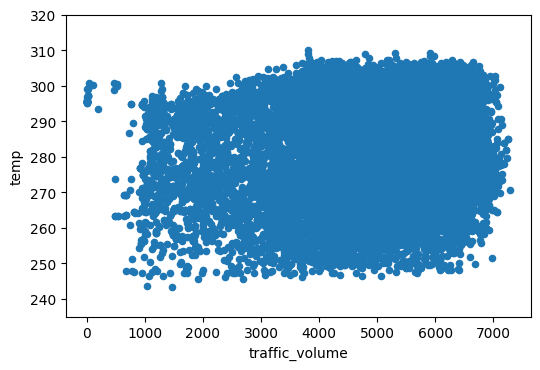

In [44]:
daytime.plot.scatter('traffic_volume','temp')
plt.ylim(235, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

## Weather Types

To start, we're going to group the data by weather_main and look at the traffic_volume averages.

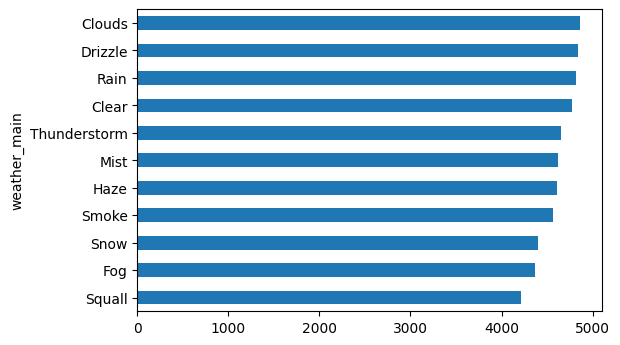

In [52]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.v

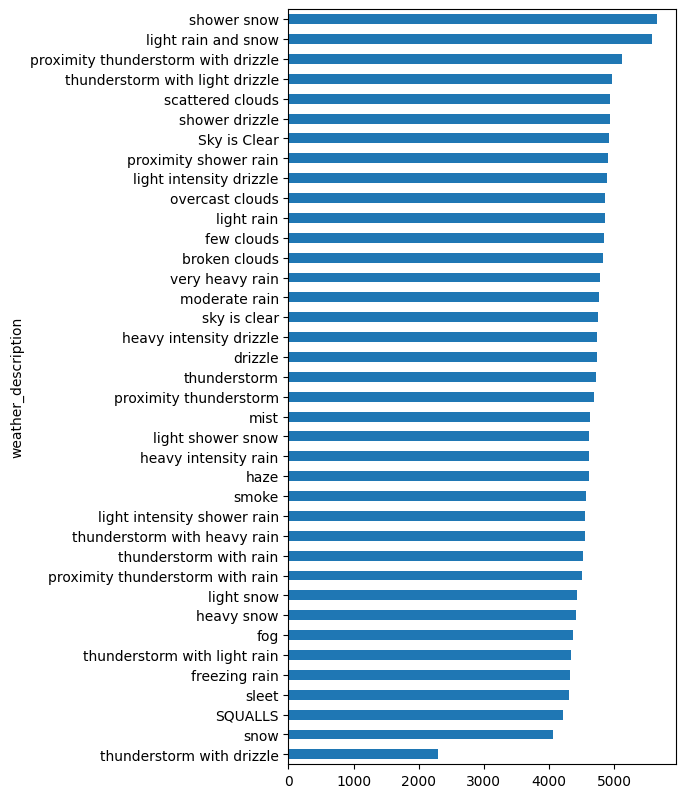

In [54]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].sort_values().plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.



# Conclusion¶

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.


#### Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle